# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this project, I utilized TensorFlow and Python to implement a deep learning pipeline to classify traffic signs for self-driving cars. I used convolutional neural networks to dramatically improve performance in image classification. I achieved a 94% testing accuracy with the help of various machine learning techniques such as regularization, dropout, pooling.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

print("Done")

Done


In [2]:
# Convert to numpy arrays
import numpy as np
np_x_train = np.array(x_train)
np_y_train = np.array(y_train)
np_x_valid = np.array(x_valid)
np_y_valid = np.array(y_valid)
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)

print("Done")

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [3]:

import numpy as np
# Number of training examples
n_train = len(np_x_train)

# Number of validation examples
n_validation = len(np_x_valid)

# Number of testing examples.
n_test = len(np_x_test)

# What's the shape of an traffic sign image?
image_shape = np_x_train.shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(np.hstack((np_y_train, np_y_valid, np_y_test))))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43



### Exploratory visualization of the dataset

In [4]:
# Load class names
import pandas as pd
df = pd.read_csv("signnames.csv")
class_names = df["SignName"]
print(class_names[:5])

0    Speed limit (20km/h)
1    Speed limit (30km/h)
2    Speed limit (50km/h)
3    Speed limit (60km/h)
4    Speed limit (70km/h)
Name: SignName, dtype: object


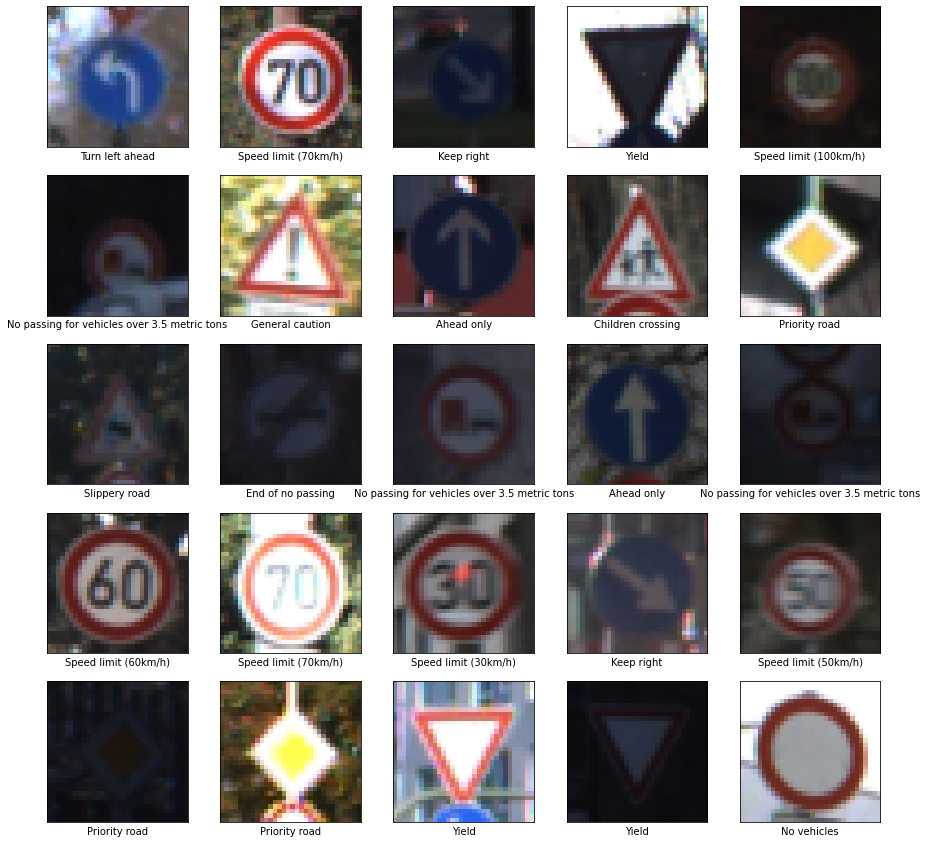

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline
from random import sample
# Show some train images
sample_inds = sample(range(0, len(np_x_train)), 25)
np_x_train_samples = np_x_train[sample_inds]
np_y_train_samples = np_y_train[sample_inds]
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_x_train_samples[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[np_y_train_samples[i]])
plt.show()

(array([ 60., 720., 750., 450., 660., 630., 150., 450., 450., 480., 660.,
        420., 690., 720., 270., 210., 150., 360., 390.,  60.,  90.,  90.,
        120., 150.,  90., 480., 180.,  60., 150.,  90., 150., 270.,  60.,
        210., 120., 390., 120.,  60., 690.,  90.,  90., 150.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42.]),
 <BarContainer object of 42 artists>)

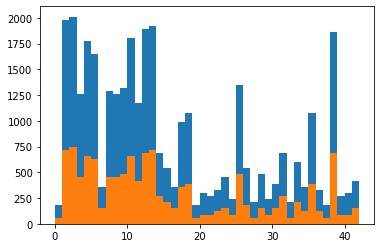

In [6]:
np_y_train = np.array(y_train)
plt.hist(np_y_train, bins=n_classes - 1)
np_y_test = np.array(y_test)
plt.hist(np_y_test,bins=n_classes - 1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Pre-process the Data Set

In [7]:
def normalize(image_set):
    """ normalize so that image data has mean zero and equal variance """
    return (image_set - 128.0) / 128.0
    
train_X_norm = normalize(np_x_train)
valid_X_norm = normalize(np_x_valid)
test_X_norm = normalize(np_x_test)

### Model Architecture

In [8]:
# Tunable parameters
dropout_rate = 0.2

In [9]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_rate, input_shape=(15, 15, 32)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_rate, input_shape=(6, 6, 64)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(dropout_rate, input_shape=(4, 4, 64)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43))

In [10]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_X_norm, np_y_train, epochs=10, 
                    validation_data=(valid_X_norm, np_y_valid))

Epoch 1/10
1088/1088 [==============================] - 21s 19ms/step - loss: 0.9374 - accuracy: 0.7284 - val_loss: 0.3877 - val_accuracy: 0.8866
Epoch 2/10
1088/1088 [==============================] - 18s 17ms/step - loss: 0.1923 - accuracy: 0.9426 - val_loss: 0.2357 - val_accuracy: 0.9308
Epoch 3/10
1088/1088 [==============================] - 18s 17ms/step - loss: 0.1210 - accuracy: 0.9637 - val_loss: 0.1965 - val_accuracy: 0.9401
Epoch 4/10
1088/1088 [==============================] - 18s 16ms/step - loss: 0.0902 - accuracy: 0.9716 - val_loss: 0.1379 - val_accuracy: 0.9599
Epoch 5/10
1088/1088 [==============================] - 20s 19ms/step - loss: 0.0793 - accuracy: 0.9759 - val_loss: 0.1308 - val_accuracy: 0.9658
Epoch 6/10
1088/1088 [==============================] - 21s 20ms/step - loss: 0.0672 - accuracy: 0.9786 - val_loss: 0.1284 - val_accuracy: 0.9619
Epoch 7/10
1088/1088 [==============================] - 20s 19ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.1556 -

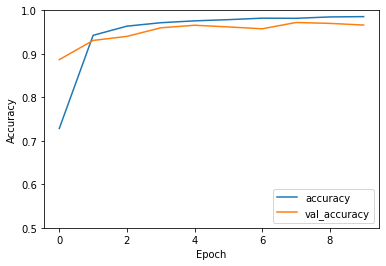

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [13]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_X_norm,  np_y_test, verbose=2)
print("Test Accuracy = {:.3f}".format(test_acc))

395/395 - 5s - loss: 0.2200 - accuracy: 0.9553
Test Accuracy = 0.955


---

## Step 3: Test a Model on New Images

Test the model on five pictures of German traffic signs from the web.

### Load and Output the Images

In [14]:
test_image_file_names = os.listdir("./images/web")
print(test_image_file_names)

['thirty.jpg', 'left.jpg', 'sixty.jpg', 'right.jpg', 'caution.jpg']


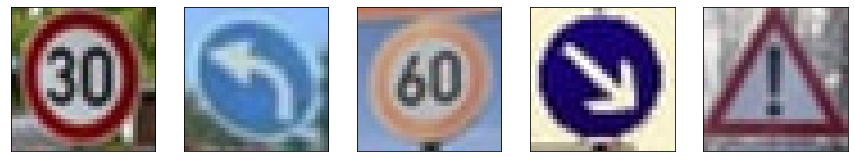

In [15]:
### Load 25 test images
image_file_names = os.listdir("./images/web")
plt.figure(figsize=(15, 15))
images = []
for image_file_name in image_file_names:
    image = plt.imread("./images/web/" + image_file_name)
    images.append(image)
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap = plt.cm.binary)
    i += 1
plt.show()

### Predict the Sign Type for Each Image

In [16]:
print(np.array(images).shape)

(5, 32, 32, 3)


In [17]:
### Run the predictions here and use the model to output the prediction for each image.
pred = model.predict(np.array(images))
print(pred[0])

[  522.62427  3216.829    1653.0796    467.2259  -1111.3046    595.8227
 -1279.637   -2470.177   -2716.7705  -4213.612   -3070.6528  -2768.5662
 -2300.4016   -520.08203 -2534.7434  -3158.75    -4459.217   -3807.4453
 -1019.027   -2350.8772  -3998.62    -1506.2828  -4407.8506  -2348.7637
 -4183.184    -833.15234 -2812.0613  -3534.901   -2746.4553  -2644.4497
 -3750.3936   -380.31876 -1889.8337  -3231.0366  -2189.6196  -2188.9893
 -1199.6943  -1659.5509   -472.76672 -2236.2773  -2083.8787  -3322.739
 -2561.1685 ]


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
def get_sample_test_accuracy(prediction, actual):
    res = 0
    size = len(prediction)
    for i in range(0, size):
        if prediction[i] == actual[i]:
            res += 1
    return res / size

prediction = np.argmax(pred, axis=1)
actual = [1, 34, 3, 38, 18]
print("Test accuracy on the 5 samples is: ", get_sample_test_accuracy(prediction, actual))

Test accuracy on the 5 samples is:  1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
print(tf.nn.top_k(tf.nn.softmax(pred), 5))

TopKV2(values=<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>, indices=<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 1,  0,  2,  3,  4],
       [34,  0,  1,  2,  3],
       [ 3,  0,  1,  2,  4],
       [38,  0,  1,  2,  3],
       [18,  0,  1,  2,  3]], dtype=int32)>)
